## Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
customer_data = pd.read_csv(r"C:\Users\91868\OneDrive\Desktop\DATA SCIENCE PROJECTS\CUSTOMER AD CLICK PREDICTION\Ad Click Data.csv")


##  Getting Information about the Dataset

In [2]:
# Get information about the dataset
print(customer_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB
None


##  Displaying Summary Statistics

In [3]:
# Display summary statistics for numerical features
print(customer_data.describe())


       Daily Time Spent on Site          Age   Area Income  \
count                987.000000  1000.000000    987.000000   
mean                  64.929524    36.009000  54980.667234   
std                   15.844699     8.785562  13439.998510   
min                   32.600000    19.000000  13996.500000   
25%                   51.270000    29.000000  46947.570000   
50%                   68.110000    35.000000  57009.760000   
75%                   78.460000    42.000000  65479.350000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage        Male  Clicked on Ad  
count            989.000000  997.000000     1000.00000  
mean             179.863620    0.480441        0.50000  
std               43.870142    0.499868        0.50025  
min              104.780000    0.000000        0.00000  
25%              138.710000    0.000000        0.00000  
50%              182.650000    0.000000        0.50000  
75%              218.790000    1.000000   

## Displaying Unique Values for Categorical Features

In [4]:
# Display unique values and their counts for categorical features
for column in customer_data.select_dtypes(include=['object']).columns:
    print("Unique values for", column)
    print(customer_data[column].value_counts())
    print()


Unique values for Ad Topic Line
Ad Topic Line
Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: count, Length: 1000, dtype: int64

Unique values for City
City
Lisamouth         3
Williamsport      3
Wrightburgh       2
West Steven       2
Robertfurt        2
                 ..
Hurleyborough     1
Garychester       1
East Kevinbury    1
Contrerasshire    1
Ronniemouth       1
Name: count, Length: 968, dtype: int64

Unique values for Country
Country
France                      9
Czech Repub

## Plotting Histograms for Numerical Features

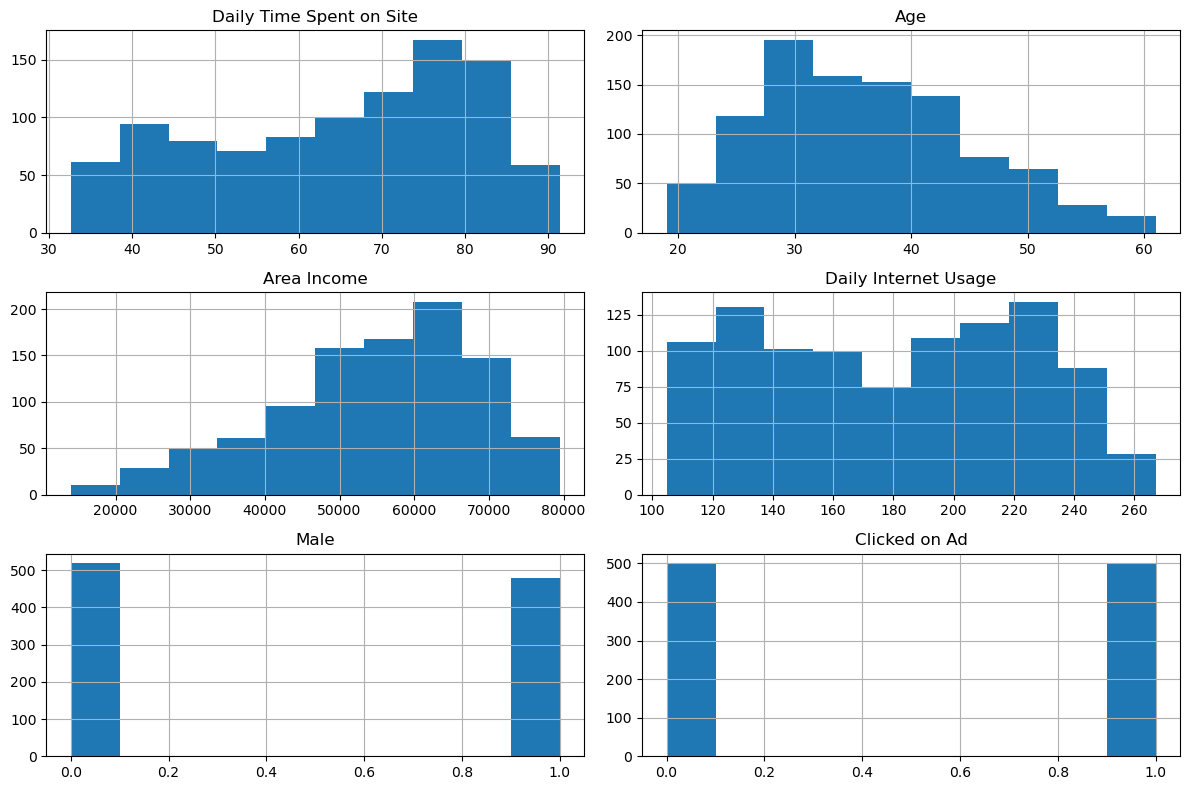

In [5]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
customer_data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


## Handling Missing Values

In [6]:
# Check for missing values
print("Missing values:\n", customer_data.isnull().sum())

# Handle missing values
# For numerical columns, fill missing values with mean
customer_data['Daily Time Spent on Site'].fillna(customer_data['Daily Time Spent on Site'].mean(), inplace=True)
customer_data['Area Income'].fillna(customer_data['Area Income'].mean(), inplace=True)
customer_data['Daily Internet Usage'].fillna(customer_data['Daily Internet Usage'].mean(), inplace=True)

# For categorical columns, fill missing values with mode
customer_data['City'].fillna(customer_data['City'].mode()[0], inplace=True)
customer_data['Country'].fillna(customer_data['Country'].mode()[0], inplace=True)


Missing values:
 Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64


In [7]:
print("Missing values:\n", customer_data.isnull().sum())


Missing values:
 Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        3
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


##  Encoding Categorical Variables and Feature Scaling

In [8]:
# Encode categorical variables
customer_data_encoded = pd.get_dummies(customer_data, columns=['City', 'Country'])

# Drop non-numeric columns or columns not suitable for modeling
customer_data_encoded.drop(['Ad Topic Line', 'Timestamp'], axis=1, inplace=True)

# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = customer_data_encoded.select_dtypes(include=[np.number]).columns
customer_data_encoded[numerical_columns] = scaler.fit_transform(customer_data_encoded[numerical_columns])

# Display the first few rows of the preprocessed dataset
print(customer_data_encoded.head())


   Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                  0.255538 -0.114905     0.513521              1.748066   
1                  0.972484 -0.570425     1.008662              0.318909   
2                  0.288588 -1.139826     0.360065              1.298817   
3                  0.586045 -0.798185    -0.013075              1.514154   
4                  0.218673 -0.114905     1.416897              1.048394   

       Male  Clicked on Ad  City_Adamsbury  City_Adamside  City_Adamsstad  \
0 -0.961619           -1.0           False          False           False   
1  1.039913           -1.0           False          False           False   
2 -0.961619           -1.0           False          False           False   
3  1.039913           -1.0           False          False           False   
4 -0.961619           -1.0           False          False           False   

   City_Alanview  ...  Country_Uruguay  Country_Uzbekistan  Country_Vanuatu  \
0

## Visualizing Distributions of Numerical Features

D:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


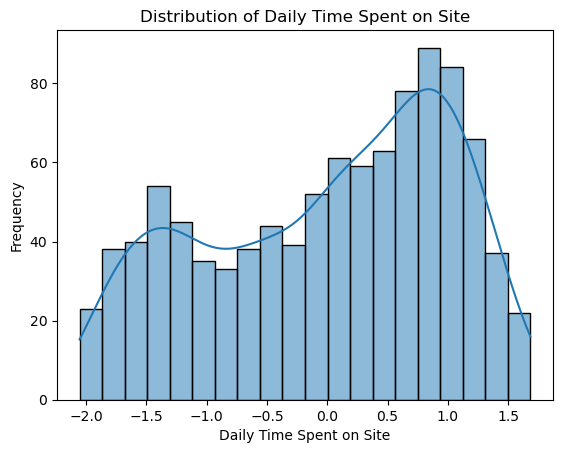

In [9]:
import seaborn as sns

# Plot histograms for numerical features
sns.histplot(customer_data_encoded['Daily Time Spent on Site'], bins=20, kde=True)
plt.title('Distribution of Daily Time Spent on Site')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Frequency')
plt.show()

# Repeat the above code for other numerical features (Age, Area Income, Daily Internet Usage)


## Splitting Data into Training and Testing Sets

In [10]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = customer_data_encoded.drop('Clicked on Ad', axis=1)
y = customer_data_encoded['Clicked on Ad']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (800, 1210) (800,)
Testing set shape: (200, 1210) (200,)


## Handling Missing Values (if any)

In [11]:
X_train.isnull().sum()
X_train["Male"].fillna(1, inplace=True)  
X_train.isnull().sum()


Daily Time Spent on Site     0
Age                          0
Area Income                  0
Daily Internet Usage         0
Male                         0
                            ..
Country_Wallis and Futuna    0
Country_Western Sahara       0
Country_Yemen                0
Country_Zambia               0
Country_Zimbabwe             0
Length: 1210, dtype: int64

## Feature Selection Using SelectKBest

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

# Identify constant features
constant_features_idx = np.where(X_train.var() == 0)[0]

# Remove constant features from the dataset
X_train_filtered = X_train.drop(X_train.columns[constant_features_idx], axis=1)

# Initialize SelectKBest with the desired number of features to select
selector = SelectKBest(score_func=f_classif, k=4)  # Select top 4 features, you can change this number as needed

# Fit SelectKBest to training data and transform the features
X_train_selected = selector.fit_transform(X_train_filtered, y_train)

# Get selected features
selected_features_mask = selector.get_support()
selected_features = X_train_filtered.columns[selected_features_mask]

# Display selected features
print("Selected Features:", selected_features)


Selected Features: Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object')


## Training Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select only the selected features for training
X_train_selected = X_train[selected_features]

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model on the selected features
model.fit(X_train_selected, y_train)

# Make predictions on the testing set
X_test_selected = X_test[selected_features]
y_pred = model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.92      0.97      0.95        89
         1.0       0.97      0.94      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200


Confusion Matrix:
[[ 86   3]
 [  7 104]]


##  Training Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier model
dt_model = DecisionTreeClassifier()

# Train the model on the selected features
dt_model.fit(X_train_selected, y_train)

# Make predictions on the testing set
y_pred_dt = dt_model.predict(X_test_selected)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)


Decision Tree Classifier Accuracy: 0.92


## Training Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier model
rf_model = RandomForestClassifier()

# Train the model on the selected features
rf_model.fit(X_train_selected, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test_selected)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)


Random Forest Classifier Accuracy: 0.935


## Grid Search for Logistic Regression Hyperparameters

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid for logistic regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2'],  # Penalty term (valid for 'lbfgs' solver)
    'solver': ['lbfgs']  # Solver algorithm
}

# Initialize GridSearchCV for logistic regression
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search_lr.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params_lr = grid_search_lr.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_lr)

# Get the best accuracy score
best_accuracy_lr = grid_search_lr.best_score_
print("Best Accuracy Score for Logistic Regression:", best_accuracy_lr)

# Train the Logistic Regression model with the best hyperparameters
final_lr_model = LogisticRegression(**best_params_lr)
final_lr_model.fit(X_train_selected, y_train)

# Make predictions on the testing set
y_pred_lr = final_lr_model.predict(X_test_selected)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)


Best Hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy Score for Logistic Regression: 0.9700000000000001
Accuracy: 0.945


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample test data
sample_data = {
    'Daily Time Spent on Site': [54.8, 42.1, 62.5],
    'Age': [35, 45, 30],
    'Area Income': [50000, 60000, 55000],
    'Daily Internet Usage': [230, 180, 250]
}

# Create a DataFrame for the sample test data
sample_df = pd.DataFrame(sample_data)

# Selected features for testing
selected_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Exclude non-numeric columns from the scaling process
numerical_columns = selected_features

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical columns
scaler.fit(sample_df[numerical_columns])

# Scale numerical features in sample data
sample_df_scaled = scaler.transform(sample_df[numerical_columns])

# Make predictions on the sample test data using the trained logistic regression model
predictions_lr_sample = final_lr_model.predict(sample_df_scaled)

# Display the predictions
print("Predictions for the sample test data:")
for i, pred in enumerate(predictions_lr_sample):
    print(f"Sample {i+1}: {'Clicked on Ad' if pred == 1 else 'Did not Click on Ad'}")


Predictions for the sample test data:
Sample 1: Clicked on Ad
Sample 2: Clicked on Ad
Sample 3: Did not Click on Ad


D:\Python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
